In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
raw_data = pd.read_csv('../dataset/creditcard.csv')

In [3]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
raw_data.shape

(284807, 31)

In [6]:
raw_data.isna().sum().any()

False

In [7]:
df = raw_data.copy()

In [8]:
array = df.values
X = array[:, :-1]
scaled_x = MinMaxScaler().fit_transform(X)
Y = array[:, -1]

In [9]:
test = SelectKBest(score_func=chi2)
fit = test.fit(scaled_x, Y)

In [10]:
# np.set_printoptions(precision=2)
print(df.columns)
print(fit.scores_)
featured_data = fit.transform(scaled_x)
print('featured data', featured_data)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
[5.95287494e+00 3.38012133e+00 9.39126526e-01 8.74213761e+00
 7.93075556e+01 2.89661634e-01 3.70052065e-01 2.13764637e+00
 2.35123756e-02 8.41962772e+00 1.33647452e+01 8.82221097e+01
 3.89534092e+01 7.87380027e-02 4.19193148e+01 7.07223945e-02
 1.90115033e+01 2.52872634e+01 1.80065078e+01 2.47190269e+00
 1.33480323e-02 1.16152596e-01 4.15055321e-04 2.65397300e-04
 2.58759848e-01 4.61650341e-03 8.24529821e-02 1.17293864e-02
 3.71117941e-03 2.48968932e-01]
featured data [[0.8813649  0.31302266 0.47531173 ... 0.43439239 0.73717255 0.65506586]
 [0.84029849 0.27179649 0.45398097 ... 0.46410518 0.72779398 0.64068109]
 [0.86814082 0.26876551 0.41060274 ... 0.35744263 0.76338099 0.64494538]
 ...
 [0.781102   0.22720215 0.47767719 ...

In [11]:
x = df.drop(['V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'], axis=1)
y = df['Class']

In [12]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.20, random_state=42)

In [14]:
print(len(x_train)/len(df) * 100)
print(len(x_test)/len(df) * 100)
print(len(x_val)/len(df) * 100)

63.99983146481652
20.000210668979342
15.99995786620413


In [15]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [16]:
print(knn.score(x_train, y_train))
print(knn.score(x_val, y_val))
y_val_pred = knn.predict(x_val)

0.9984035199367991
0.9986394259255196


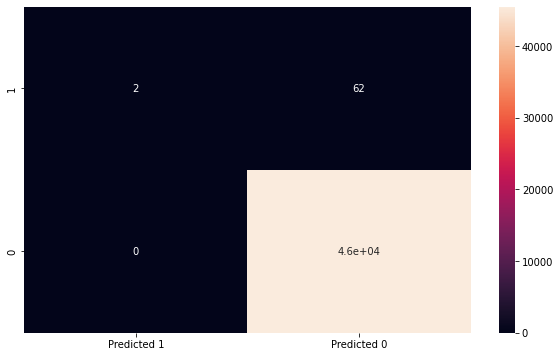

In [17]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_val, y_val_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[1, 0], columns=['Predicted 1', 'Predicted 0'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_cm, annot=True)
plt.show()

In [18]:
from sklearn.utils import resample

class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]

df_upsample = resample(
    class_1,
    replace=True,
    n_samples=len(class_0) - 492,
    random_state=33
)

In [19]:
df_upsample = df_upsample.reset_index(drop=True)

df = pd.concat([df, df_upsample], axis=0)
df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [20]:
x_train1, x_test, y_train1, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.20, random_state=42)

In [21]:
print(len(x_train)/len(df) * 100)
print(len(x_test)/len(df) * 100)
print(len(x_val)/len(df) * 100)

32.05529078662751
10.017410266781562
8.013822696656877


In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [23]:
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))
y_test_pred = knn.predict(x_test)

0.9984035199367991
0.9983673326077034


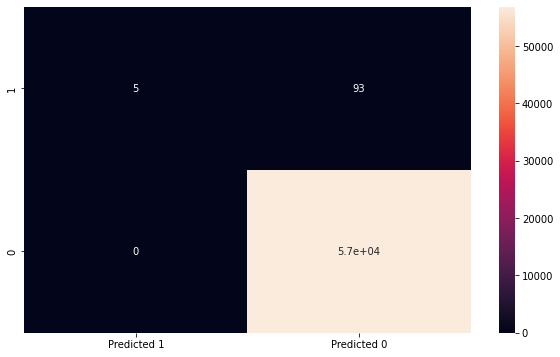

In [25]:
cm = metrics.confusion_matrix(y_test, y_test_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index=[1, 0], columns=['Predicted 1', 'Predicted 0'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_cm, annot=True)
plt.show()